
### **Hi , we will learn how to find a Correlation in our datasets.**

### **Let's get started: **

### **Import our Libraries**

In [57]:
import pandas as pd # To read and analysis our data
import seaborn as sns # to see correlation in the dataset using Heat map
import matplotlib.pyplot as plt # to Visualize our dataset


### **Read data set and display our dataset**



In [58]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### **Explanation of the Dataset**

so we have 14 Columns , we can see that this is a Dataset for students preformence.

`Gender` : Male or Female.

`EthnicGroup` : which group this student belongs to.

`ParentEduc` : Education of parents students.

`LunchType` : Launch type of the students.

`TestPrep` : do the student do a test prepreation before the exam or not.

`ParentMaritalStatus` : is the parents married or devorsed.

`PracticeSport` : dose the student practies support or not.

`IsFirstChild` : is this student the first child [Y/N].

`NrSiblings` : Number of sbilings.

`TransportMeans ` : How do the students go to school.


`WklyStudyHours` : Number of Hours they studes Weekly.

`MathScore` : Degree in math test.

`ReadingScore`: Degree in English Reading test.   

`WritingScore` : Degree in English Writing test.



















## **Let's do some EDA :**

In [60]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### **we have so many nulls value ...**

### **let's handle them :**

In [61]:
df["EthnicGroup"].fillna("Other" , inplace =True)
# if they don't belong to any existing group that's mean they belong to 'Other' Gropups

In [62]:
df["ParentEduc"].fillna("Other" , inplace =True)
# if they don't have any existing Education that's mean they belong to 'Other'parent Education

In [63]:
df["TestPrep"].mode()
#check the mode if it's possible to fill it with mode.

0    none
Name: TestPrep, dtype: object

In [64]:
df["TestPrep"].fillna("Unkown" , inplace =True)
#Fill the null with 'Unkown' 'cause we don't know if they did the test prep or no.

In [65]:
df['NrSiblings'] = df['NrSiblings'].astype(pd.Int64Dtype())
#change type of Number of Siblings to int so we can see the max , min , mean and count
#let's describe df

In [66]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.0,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.0,0.000000,10.000000,4.000000
25%,249.000000,1.0,56.000000,59.000000,58.000000
50%,500.000000,2.0,67.000000,70.000000,69.000000
75%,750.000000,3.0,78.000000,80.000000,79.000000
max,999.000000,7.0,100.000000,100.000000,100.000000


In [67]:
#we can see that the number of Siblings mean is 2 so :
df['NrSiblings'].fillna(2, inplace=True)

In [68]:
df["WklyStudyHours"].mode()
#check the mode

0    5 - 10
Name: WklyStudyHours, dtype: object

In [69]:
df['WklyStudyHours'].fillna(5 - 10, inplace=True)
#fill the null '5 - 10'

In [70]:
df["ParentMaritalStatus"].mode()
#check the mode

0    married
Name: ParentMaritalStatus, dtype: object

In [71]:
df['ParentMaritalStatus'].fillna("married", inplace=True)
#fill the null 'married'

In [72]:
df['IsFirstChild'].fillna("Unkown", inplace=True)
# we don't know if this student if he/she the 1st child or not.

In [73]:
df["PracticeSport"].mode()
#check the mode

0    sometimes
Name: PracticeSport, dtype: object

In [74]:
df['PracticeSport'].fillna("sometimes", inplace=True)
# fill with the mode

In [75]:
df["TransportMeans"].mode()
#check the mode

0    school_bus
Name: TransportMeans, dtype: object

In [76]:
df['TransportMeans'].fillna("school_bus", inplace=True)
# fill with the mode

In [77]:
# now we check if the dataset still have nulls value or no
df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

### **That's great , now we can findout what is the Correlations?**

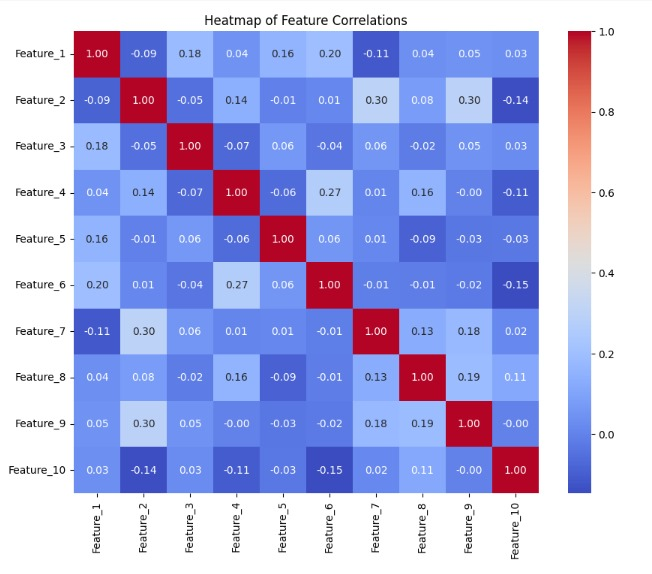

`Correlations` : is a statistical measure that expresses the extent to which two variables are linearly related.


We can find Correlations from the Features (Columns) in this dataset using heat map from seaborne lib. Let's see how it works:


### Do you think the parent Education might effect in the students score?
# Let's see :)

In [78]:
# create a new df we can call it df1 to make a groupby bettwen ParentEduc and the mean of the score of each test like this :

df1=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} , inplace = True)
print(df1)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
Other               66.645528     69.225474     68.295935
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


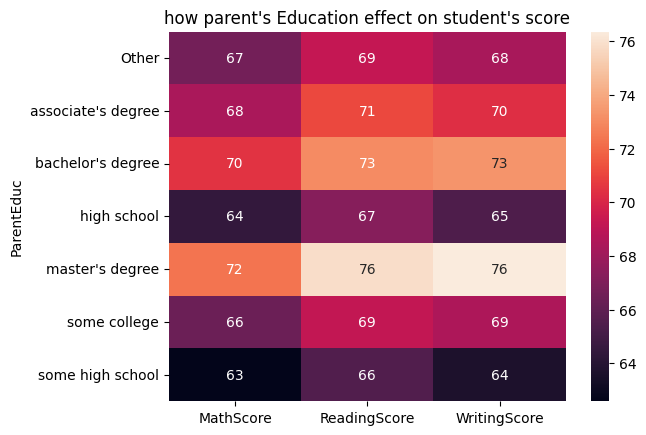

In [79]:
# now we can do the heatmap :

sns.heatmap(df1 , annot= True)
plt.title("how parent's Education effect on student's score")
plt.show()

**Now we can see the correlations bettwen the parents who have master degree the students Scores.**

**So we can findout : That the student's who have High scores there parents have master dgree.**



#**Now it's your turn to find out more correlations the same way we did before**
###**Fill the '-----' with your thoughts.**

In [80]:
df2=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} , inplace = True)
print(df2)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.650161     69.379561     68.406177
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


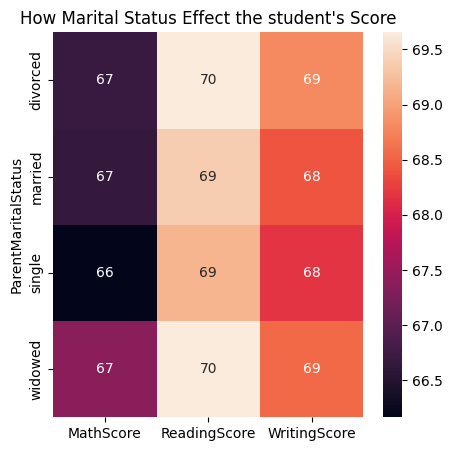

In [81]:
plt.figure(figsize=(5,5))
sns.heatmap(df2 , annot= True)
plt.title("How Marital Status Effect the student's Score")
plt.show()

#**Now you can start working in finding out the Correlations with your own :**

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           30641 non-null  int64 
 1   Gender               30641 non-null  object
 2   EthnicGroup          30641 non-null  object
 3   ParentEduc           30641 non-null  object
 4   LunchType            30641 non-null  object
 5   TestPrep             30641 non-null  object
 6   ParentMaritalStatus  30641 non-null  object
 7   PracticeSport        30641 non-null  object
 8   IsFirstChild         30641 non-null  object
 9   NrSiblings           30641 non-null  Int64 
 10  TransportMeans       30641 non-null  object
 11  WklyStudyHours       30641 non-null  object
 12  MathScore            30641 non-null  int64 
 13  ReadingScore         30641 non-null  int64 
 14  WritingScore         30641 non-null  int64 
dtypes: Int64(1), int64(4), object(10)
memory usage: 3.5+ 

In [83]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [84]:
df3 = df.groupby(["ParentMaritalStatus", "Gender"]).agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'}, inplace =True)
print(df3)

                            MathScore  ReadingScore  WritingScore
ParentMaritalStatus Gender                                       
divorced            female  64.556809     73.278988     73.363035
                    male    69.026394     65.690081     63.805875
married             female  64.120112     72.859384     72.877647
                    male    69.129103     65.970030     64.025030
single              female  63.620368     72.514137     72.434806
                    male    68.850318     65.616676     63.680950
widowed             female  64.433566     73.153846     73.013986
                    male    70.121311     66.367213     64.390164


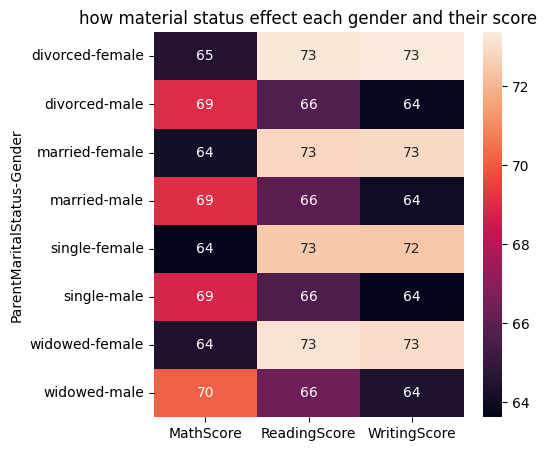

In [85]:
plt.figure(figsize=(5,5))
sns.heatmap(df3, annot = True)
plt.title("how material status effect each gender and their score")
plt.show()

In [86]:
df4=df.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} , inplace = True)
print(df3)

                            MathScore  ReadingScore  WritingScore
ParentMaritalStatus Gender                                       
divorced            female  64.556809     73.278988     73.363035
                    male    69.026394     65.690081     63.805875
married             female  64.120112     72.859384     72.877647
                    male    69.129103     65.970030     64.025030
single              female  63.620368     72.514137     72.434806
                    male    68.850318     65.616676     63.680950
widowed             female  64.433566     73.153846     73.013986
                    male    70.121311     66.367213     64.390164


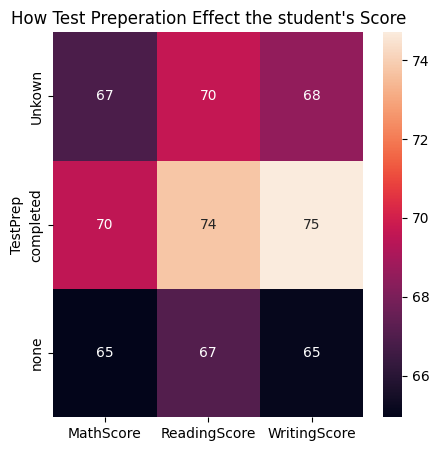

In [87]:
plt.figure(figsize=(5,5))
sns.heatmap(df4, annot = True)
plt.title("How Test Preperation Effect the student's Score")
plt.show()

# Data Cleaning

This section is practicing on data cleaning as required from the instructor

## Importing Libraries

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset

In [89]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [90]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


## EDA

In [94]:
# checking null values

df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Start cleaning

Before we handle the null values I noticed that since we already have indexes in the df we don't need the unamed column

In [95]:
df.drop('Unnamed: 0', axis=1 , inplace = True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [97]:
df["EthnicGroup"].fillna("Other", inplace=True)

In [99]:
df["ParentEduc"].fillna("Other", inplace=True)

In [100]:
df["TestPrep"].mode()

0    none
Name: TestPrep, dtype: object

In [101]:
df["TestPrep"].fillna("Unkown" , inplace =True)

In [ ]:
df["NrSiblings"] = df["NrSiblings"].astype(pd.Int64Dtype())

# I didn't use this col before and I don't see the use in it,
# I'm not gonna drop it since I wanna try the astype with 64 bit of int to change it

In [104]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


I see that the std is high in some of the after I clean I wanna see if there's any outliers to clean them

In [105]:
df['NrSiblings'].fillna(2, inplace=True)

In [122]:
df["WklyStudyHours"].mode()[0] # to fill in the func

'5 - 10'

In [123]:
df['NrSiblings'].fillna(df["WklyStudyHours"].mode()[0], inplace=True)

In [124]:
df['ParentMaritalStatus'].fillna(df["ParentMaritalStatus"].mode()[0], inplace=True)

In [125]:
df['PracticeSport'].fillna(df["PracticeSport"].mode()[0], inplace=True)

In [126]:
df['TransportMeans'].fillna(df["TransportMeans"].mode()[0], inplace=True)

In [127]:
df.isnull().sum()

Gender                   0
EthnicGroup              0
ParentEduc               0
LunchType                0
TestPrep                 0
ParentMaritalStatus      0
PracticeSport            0
IsFirstChild           904
NrSiblings               0
TransportMeans           0
WklyStudyHours         955
MathScore                0
ReadingScore             0
WritingScore             0
dtype: int64

In [129]:
df['IsFirstChild'].fillna(df["IsFirstChild"].mode()[0], inplace=True)

In [130]:
df['WklyStudyHours'].fillna(df["WklyStudyHours"].mode()[0], inplace=True)

In [131]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

Data is cleaned except checking the outlier

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  object 
 7   IsFirstChild         30641 non-null  object 
 8   NrSiblings           30641 non-null  float64
 9   TransportMeans       30641 non-null  object 
 10  WklyStudyHours       30641 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [133]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,Other,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,Unkown,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [134]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

<Axes: >

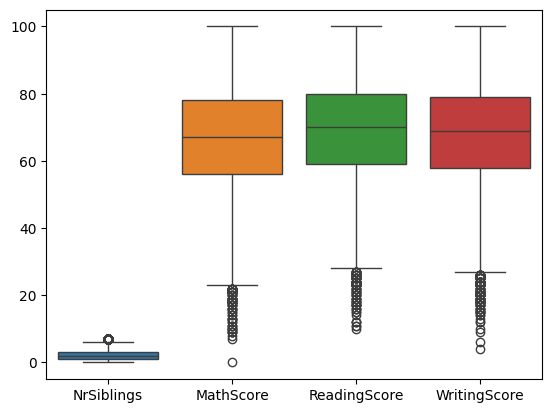

In [135]:
sns.boxplot(df)

there are some outliers

In [139]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

This function is taken from a Previews lab

In [140]:
df = remove_outliers(df, 'MathScore')
df = remove_outliers(df, 'NrSiblings')
df = remove_outliers(df, 'ReadingScore')
df = remove_outliers(df, 'WritingScore')

<Axes: >

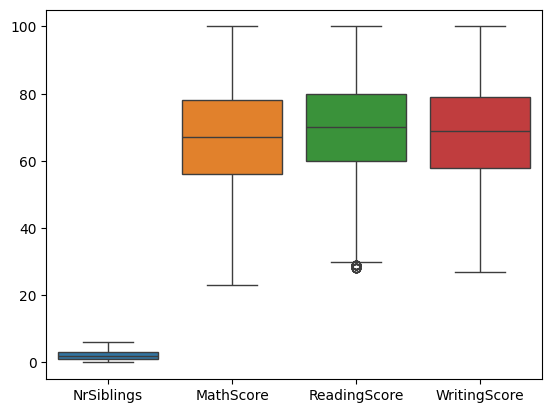

In [141]:
sns.boxplot(df)

I don't Understand why I still have some outliers in the reading score before I remove them I'll ask the instructor for further info tomorrow inshallah